Acc: 86.17%
Acc: 92.55%
Acc: 93.56%


Enter a number (0 - 59999):  50


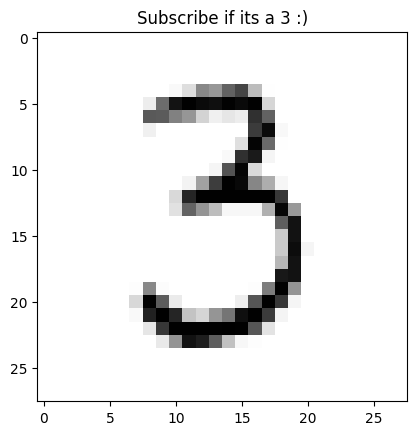

Enter a number (0 - 59999):  100


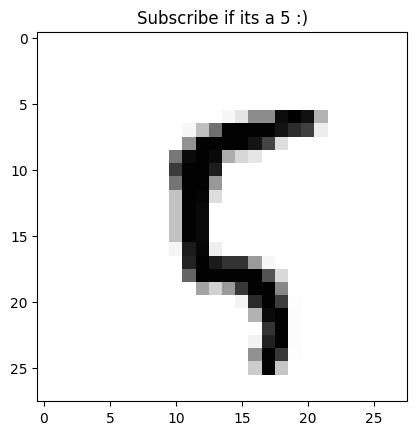

Enter a number (0 - 59999):  4


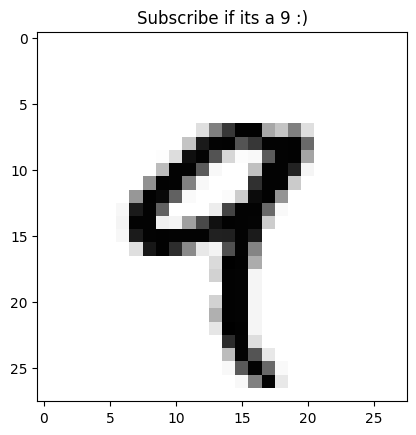

In [ ]:
from mnist_loader import get_mnist
import numpy as np
import matplotlib.pyplot as plt

# layers  input -> hidden -> output conntected through channles with weights
"""
w = weights, b = bias, i = input, h = hidden, o = output, l = label
e.g. w_i_h = weights from input layer to hidden layer
"""
images, labels = get_mnist() # get the dataset of numbers from 0 - 9  --ready to train the model
w_i_h = np.random.uniform(-0.5, 0.5, (20, 784)) 
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_i_h = np.zeros((20, 1))
b_h_o = np.zeros((10, 1))

learn_rate = 0.01
nr_correct = 0
epochs = 3
for epoch in range(epochs):
    for img, l in zip(images, labels):
        img.shape += (1,) # change from vector to matrix
        l.shape += (1,)
        # Forward propagation input -> hidden
        h_pre = b_i_h + w_i_h @ img
        h = 1 / (1 + np.exp(-h_pre)) # activation function 
        # Forward propagation hidden -> output
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l)) # check if the output is equal to the label(is the result correct)

        # Backpropagation output -> hidden (cost function derivative)
        # this is for updating the weight so we can improve the result and reduce the error rate
        delta_o = o - l
        w_h_o += -learn_rate * delta_o @ np.transpose(h)
        b_h_o += -learn_rate * delta_o
        # Backpropagation hidden -> input (activation function derivative)
        delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
        w_i_h += -learn_rate * delta_h @ np.transpose(img)
        b_i_h += -learn_rate * delta_h

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

# Show results
while True:
    index = int(input("Enter a number (0 - 59999): ")) # choose the image number from the dataset that contains 60 000  image 
    img = images[index] # get the choosen image
    plt.imshow(img.reshape(28, 28), cmap="Greys")   # reshape the image to 28 * 28 2D in the grayscale
    
    img.shape += (1,) # reshape the image from (one dimention array (784,)) to matrix by adding another dimension -> (784,1)
    # Forward propagation input -> hidden
    h_pre = b_i_h + w_i_h @ img.reshape(784, 1)
    h = 1 / (1 + np.exp(-h_pre))
    # Forward propagation hidden -> output
    o_pre = b_h_o + w_h_o @ h
    o = 1 / (1 + np.exp(-o_pre))

    plt.title(f"Subscribe if its a {o.argmax()} :)") # the max result of the output neurons will be the choosen output
    plt.show() # display the image from the dataset 